In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [5]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


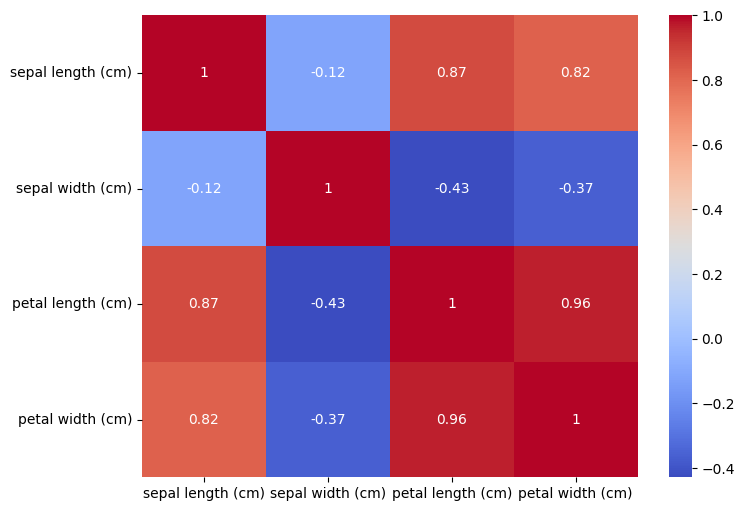

In [12]:
corr = iris.corr()
plt.figure(figsize=(8, 6))
plt.show(sns.heatmap(corr, annot=True, cmap='coolwarm'))


In [20]:
x = iris.drop('petal length (cm)', axis=1)
y = iris['petal length (cm)'] 

In [ ]:
y_class = pd.cut(y, bins=3, labels=False)
 # in this dataset we have continous values and for RF we need discrete values so we change them to classes it 
x_train,  x_test, y_train, y_test = train_test_split(x,y_class, test_size=0.3 ,  random_state=42)

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for testing: {accuracy * 100:.2f}%')

Accuracy for testing: 95.56%


In [37]:
y_tr_prd = rf.predict(x_train)
accuracy = accuracy_score(y_train, y_tr_prd)
print(f'Accuracy for training: {accuracy * 100:.2f}%')

Accuracy for training: 100.00%


In [39]:
# 5 fold CV

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, x, y_class, cv=kf, scoring = 'accuracy')

print("Accuracy per fold:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Accuracy per fold: [0.93333333 0.96666667 0.86666667 0.86666667 0.9       ]
Mean Accuracy: 0.9066666666666666


In [ ]:
""" Since we have a similar accuracy in both training and testing, and the cross-validation scores are also similar,
    it indicates that our model is a good fit. """